In [4]:
import pandas as pd

## Section 1

In [5]:
salary_data = 'ds_salaries_dirty.csv'
salary_df_copy = salary_data

In [6]:
salary_df = pd.read_csv(salary_data)
salary_df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,DS,173946.0,50,IN,L
3,2022,NaN,FT,ML Engineer,146336.0,50,DE,S
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L
5,2023,MI,FT,Data Scientist,35539.0,50,GB,S
6,2020,NaN,FL,AI Specialist,214423.0,100,DE,XL
7,2020,EX,FL,ML Engineer,222339.0,50,IN,S
8,2022,MI,PT,DS,209426.0,100,US,S
9,2021,SE,FT,ML Engineer,5000000.0,100,IN,M


In [7]:
salary_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         100 non-null    int64  
 1   experience_level  90 non-null     object 
 2   employment_type   92 non-null     object 
 3   job_title         100 non-null    object 
 4   salary_in_usd     96 non-null     float64
 5   remote_ratio      100 non-null    int64  
 6   company_location  94 non-null     object 
 7   company_size      100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [9]:
salary_df.dropna(inplace = True) # this removes less than 25% of the data, so it's still good

In [10]:
salary_df.isna().count()

work_year           76
experience_level    76
employment_type     76
job_title           76
salary_in_usd       76
remote_ratio        76
company_location    76
company_size        76
dtype: int64

In [11]:
salary_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,DS,173946.0,50,IN,L
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L
5,2023,MI,FT,Data Scientist,35539.0,50,GB,S
...,...,...,...,...,...,...,...,...
93,2021,SE,PT,AI Specialist,211408.0,50,DE,S
94,2021,SE,PT,Data Analyst,148015.0,50,NG,S
96,2021,MI,PT,AI Specialist,56641.0,0,US,M
98,2021,EN,FT,AI Specialist,193817.0,0,NG,S


In [12]:
salary_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         76 non-null     int64  
 1   experience_level  76 non-null     object 
 2   employment_type   76 non-null     object 
 3   job_title         76 non-null     object 
 4   salary_in_usd     76 non-null     float64
 5   remote_ratio      76 non-null     int64  
 6   company_location  76 non-null     object 
 7   company_size      76 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.3+ KB


In [13]:
salary_df['job_title'].value_counts() #checking for incosistency with the job titles

job_title
AI Specialist     23
Data Scientist    19
Data Analyst      18
ML Engineer       12
DS                 4
Name: count, dtype: int64

In [14]:
salary_df['job_title'] = salary_df['job_title'].str.replace('DS', 'Data Scientist') #replaced DS with Data Scientist 

In [15]:
salary_df['job_title'].value_counts() 

job_title
Data Scientist    23
AI Specialist     23
Data Analyst      18
ML Engineer       12
Name: count, dtype: int64

#### The dataset had a few null cells, which were dropped; the dropped data accounted for less than 25% of the entire dataset. 
#### There were also incorrect/ invalid job titles

## Section 2

In [16]:
salary_df.rename(columns = {'salary_in_usd' : 'salary($)'}, inplace = True)

In [17]:
salary_df

,work_year,experience_level,employment_type,job_title,salary($),remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,Data Scientist,173946.0,50,IN,L
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L
5,2023,MI,FT,Data Scientist,35539.0,50,GB,S
...,...,...,...,...,...,...,...,...
93,2021,SE,PT,AI Specialist,211408.0,50,DE,S
94,2021,SE,PT,Data Analyst,148015.0,50,NG,S
96,2021,MI,PT,AI Specialist,56641.0,0,US,M
98,2021,EN,FT,AI Specialist,193817.0,0,NG,S


In [18]:
salary_df['experience_level'].value_counts()

experience_level
SE    23
EN    20
MI    18
EX    15
Name: count, dtype: int64

In [19]:
# Analysis of salary trends based on experience levels
salary_df.groupby('experience_level')['salary($)'].mean()

experience_level
EN    128773.450000
EX    168610.266667
MI    689868.111111
SE    355328.956522
Name: salary($), dtype: float64

In [22]:
# did this for all four experience levels
salary_df['experience_level'] = salary_df['experience_level'].str.replace('SE', 'Senior-level(SE)')

In [24]:
salary_df['experience_level'] = salary_df['experience_level'].str.replace('MI', 'Mid-level(MI)')

In [26]:
salary_df['experience_level'] = salary_df['experience_level'].str.replace('EN', 'Entry-level(EN)')

In [27]:
salary_df['experience_level'] = salary_df['experience_level'].str.replace('EX', 'Executive-level')

<Axes: xlabel='Experience Level'>

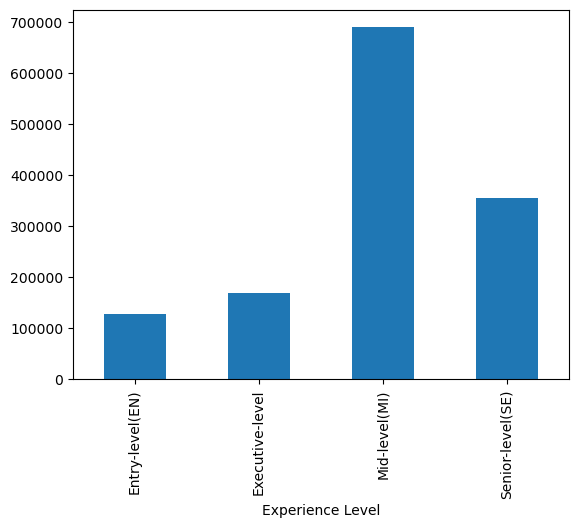

In [28]:
#this returns a pie chart based on the mean average of the salaries to the experience levels
salary_df.groupby('experience_level')['salary($)'].mean().plot(kind = 'bar', xlabel = 'Experience Level')

#### Salaries generally increase as experience increases from entry-level to senior-level. 
#### However, the executive group shows a drop in average salary, which may suggest fewer executive roles in the dataset

## Section 3

In [29]:
salary_df

,work_year,experience_level,employment_type,job_title,salary($),remote_ratio,company_location,company_size
0,2022,Senior-level(SE),CT,Data Scientist,42183.0,50,IN,L
1,2023,Mid-level(MI),FL,Data Scientist,190371.0,100,IN,S
2,2020,Mid-level(MI),CT,Data Scientist,173946.0,50,IN,L
4,2022,Mid-level(MI),FL,ML Engineer,9999999.0,100,NG,L
5,2023,Mid-level(MI),FT,Data Scientist,35539.0,50,GB,S
...,...,...,...,...,...,...,...,...
93,2021,Senior-level(SE),PT,AI Specialist,211408.0,50,DE,S
94,2021,Senior-level(SE),PT,Data Analyst,148015.0,50,NG,S
96,2021,Mid-level(MI),PT,AI Specialist,56641.0,0,US,M
98,2021,Entry-level(EN),FT,AI Specialist,193817.0,0,NG,S


'\nfull time = 100 hybrid = 50 on-site = 0 \n'

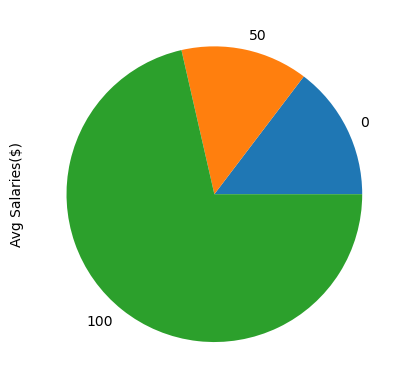

In [51]:
salary_df.groupby('remote_ratio')['salary($)'].mean().plot(kind = 'pie', ylabel = 'Avg Salaries($)')
"""
full time = 100
hybrid = 50
on-site = 0 
"""

### Fully remote workers earn the highest salaries while, on-site and hybrid are considered less

### Section 4

In [52]:
max_salary = salary_df.groupby(['experience_level', 'job_title'])['salary($)'].max()
max_salary

experience_level  job_title     
Entry-level(EN)   AI Specialist      201890.0
                  Data Analyst       231163.0
                  Data Scientist     206308.0
                  ML Engineer         93208.0
Executive-level   AI Specialist      247903.0
                  Data Analyst       178501.0
                  Data Scientist     235615.0
                  ML Engineer        222339.0
Mid-level(MI)     AI Specialist      200862.0
                  Data Analyst       227307.0
                  Data Scientist     209426.0
                  ML Engineer       9999999.0
Senior-level(SE)  AI Specialist      211408.0
                  Data Analyst       240981.0
                  Data Scientist     193707.0
                  ML Engineer       5000000.0
Name: salary($), dtype: float64

<Axes: xlabel='experience_level,job_title'>

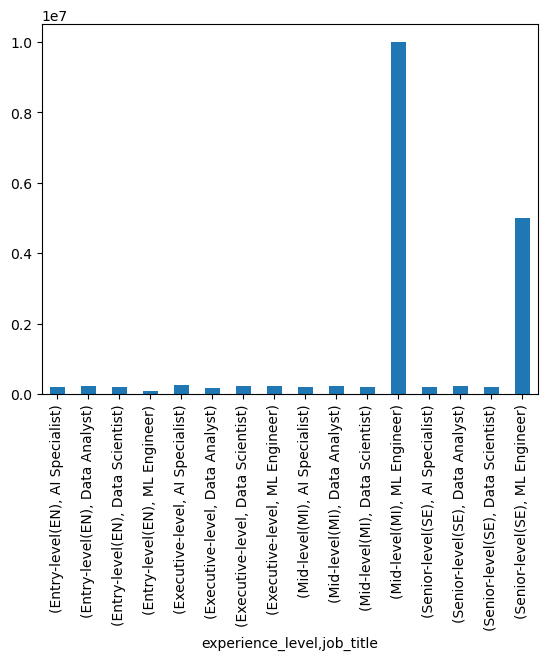

In [53]:
max_salary.plot(kind = 'bar')

In [ ]:
"""
The analysis shows the maximum salary of each job title based on their experience level. 
From the chart above, there is a great spike in earnings from the ML engineers in both mid and senior levels of expertise. 
This could be an outlier compared to the other salaries, it also shows how a higher experience level in technical roles earns more than entry-level roles,
"""

In [37]:
min_salary = salary_df.groupby(['experience_level', 'job_title'])['salary($)'].min()
min_salary

experience_level  job_title     
Entry-level(EN)   AI Specialist          50.0
                  Data Analyst        51357.0
                  Data Scientist      60746.0
                  ML Engineer         32869.0
Executive-level   AI Specialist      112989.0
                  Data Analyst       106213.0
                  Data Scientist      66212.0
                  ML Engineer         68467.0
Mid-level(MI)     AI Specialist       56641.0
                  Data Analyst        53328.0
                  Data Scientist      35539.0
                  ML Engineer       9999999.0
Senior-level(SE)  AI Specialist       79377.0
                  Data Analyst        68360.0
                  Data Scientist      42183.0
                  ML Engineer         73484.0
Name: salary($), dtype: float64

<Axes: xlabel='experience_level,job_title'>

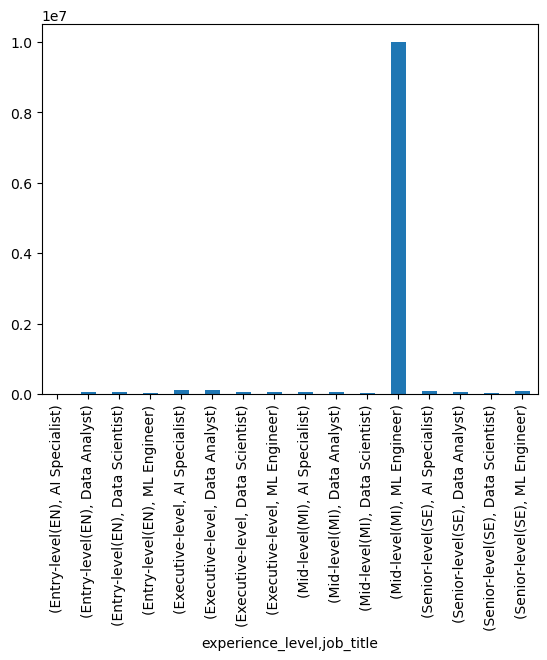

In [38]:
min_salary.plot(kind = 'bar')

In [ ]:
"""
The analysis shows the minimum salary of each job title based on their experience level. 
The chart above suggests that some jobs at the entry to mid-levels may have very low incomes (possible outliers),
and there is a significant spike in earnings in the mid-level section of an ML engineer, suggesting that the lowest-paid person in this role earns a high salary compared to everyone else.
All other job titles and levels are in the same minimum earning range   
"""